# Regression example with a neural network

## MLPRegressor

It turns out that the simple MLPRegressor in Scikit-Learn works very well on small datasets.

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
with gzip.open("rec_hist_pt_25.pkl.gz") as f:
    rec = pickle.load(f)

with gzip.open("gen_hist_pt_25.pkl.gz") as f:
    gen = pickle.load(f)

rec = rec[:,:,:,:,:]
gen = gen[:,:,:,:,:]
# fix for divide by zero
gen.values()[gen.values() == 0] = 1

n = gen.values()
ns = rec.values()
# fix for rec > n
ns = np.where(ns > n, n, ns)
nf = n - ns

eff = ns / n

z = 1
sigma_eff = z/(n + z ** 2) * np.sqrt(ns * nf / (n + 1e-8) + z ** 2 / 4)

X = []
y = []
w = []
for ieta, eta in enumerate(rec.axes[0].centers):
    for ipt, pt in enumerate(rec.axes[1].centers):
        for iphi, phi in enumerate(rec.axes[2].centers):
            for ich, _ in enumerate(rec.axes[3]):
                for isp, _ in enumerate(rec.axes[4]):
                    X.append((eta, np.log(pt), np.cos(phi), np.sin(phi), ich, isp))
                    y.append(eff[ieta, ipt, iphi, ich, isp])
                    w.append(1/sigma_eff[ieta, ipt, iphi, ich, isp])

X = np.array(X).astype(np.float32)
y = np.array(y).astype(np.float32)
w = np.array(w).astype(np.float32)

print("data points", X.shape[0])

data points 14400


In [16]:
# scikit-learn
net = MLPRegressor(
    hidden_layer_sizes=(2**6,) * 5,
    batch_size=100,
    alpha=0,
    tol=1e-6,
    max_iter=10000,
    verbose=1,
)

clf = make_pipeline(StandardScaler(), net)

clf.fit(X, y)

n = 0
for c in net.coefs_:
    n += np.prod(c.shape)
for c in net.intercepts_:
    n += c.shape[0]
print("number of parameters", n)

Iteration 1, loss = 0.01969663
Iteration 2, loss = 0.00350687
Iteration 3, loss = 0.00245632
Iteration 4, loss = 0.00197593
Iteration 5, loss = 0.00175609
Iteration 6, loss = 0.00164544
Iteration 7, loss = 0.00140919
Iteration 8, loss = 0.00131983
Iteration 9, loss = 0.00112184
Iteration 10, loss = 0.00110707
Iteration 11, loss = 0.00102675
Iteration 12, loss = 0.00096240
Iteration 13, loss = 0.00097759
Iteration 14, loss = 0.00093621
Iteration 15, loss = 0.00090874
Iteration 16, loss = 0.00086325
Iteration 17, loss = 0.00086946
Iteration 18, loss = 0.00092021
Iteration 19, loss = 0.00082390
Iteration 20, loss = 0.00085494
Iteration 21, loss = 0.00085404
Iteration 22, loss = 0.00083000
Iteration 23, loss = 0.00077776
Iteration 24, loss = 0.00078585
Iteration 25, loss = 0.00075060
Iteration 26, loss = 0.00074855
Iteration 27, loss = 0.00074264
Iteration 28, loss = 0.00074757
Iteration 29, loss = 0.00072960
Iteration 30, loss = 0.00074463
Iteration 31, loss = 0.00076818
Iteration 32, los

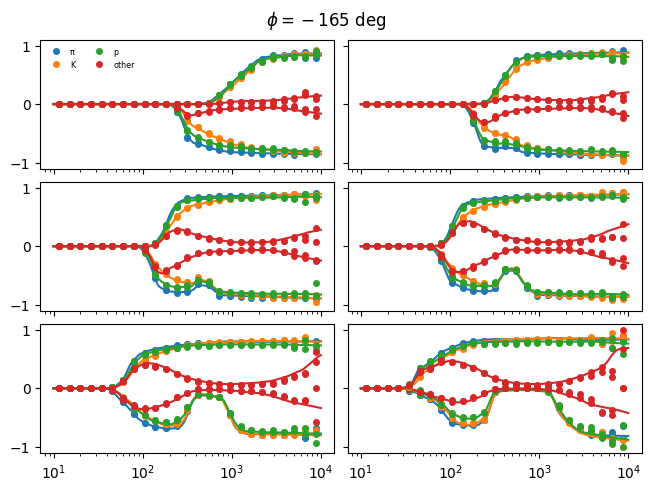

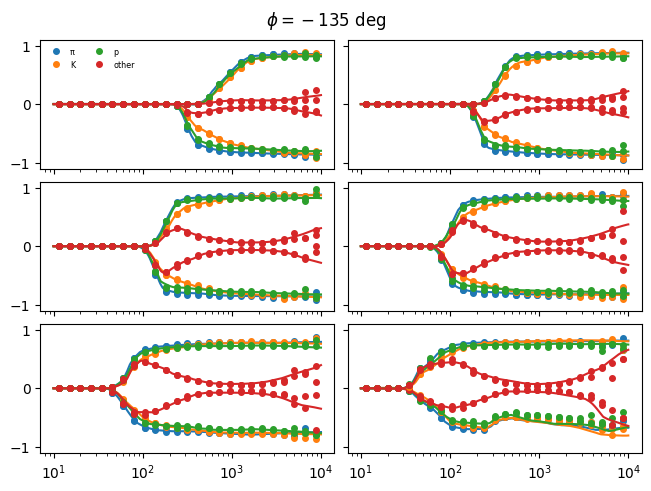

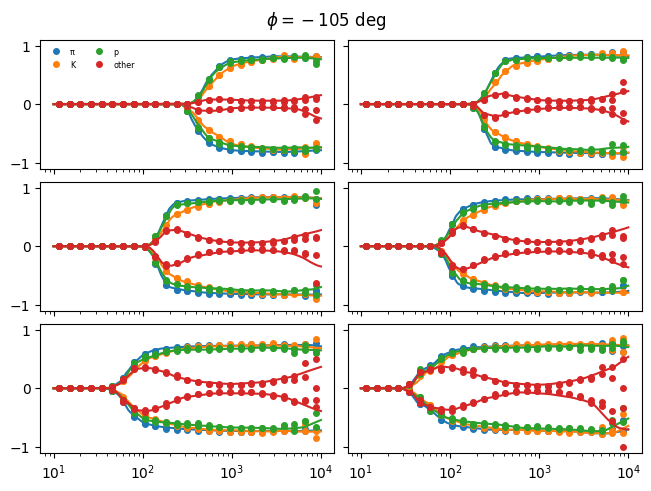

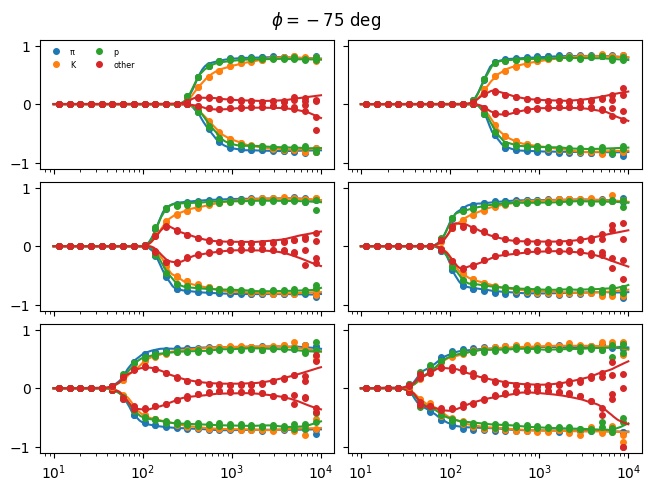

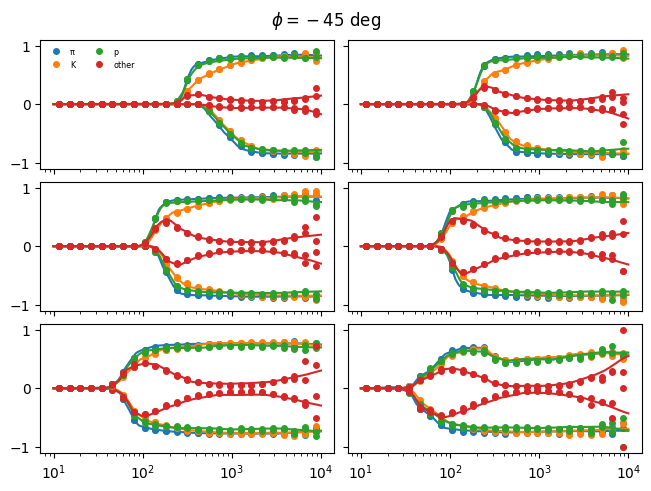

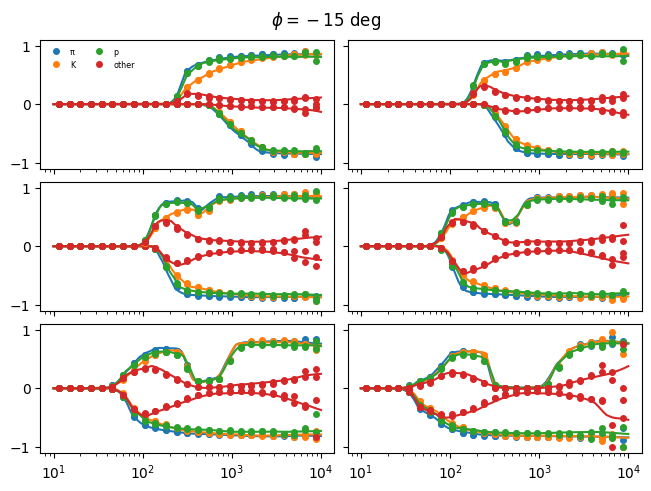

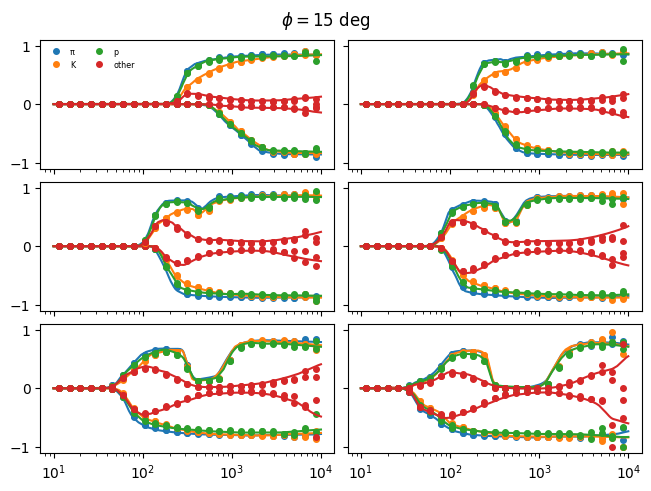

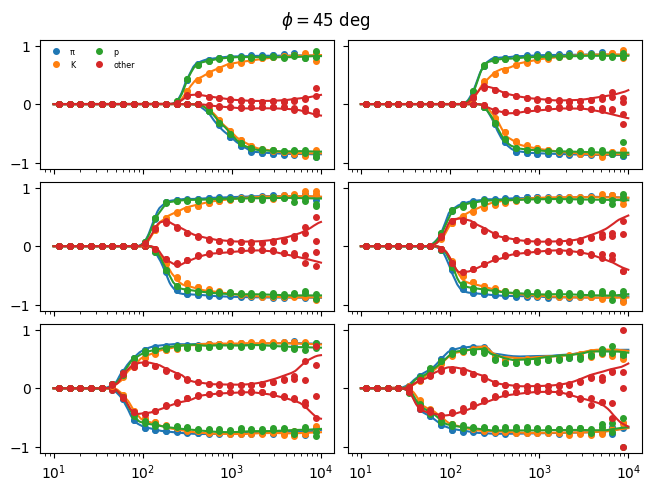

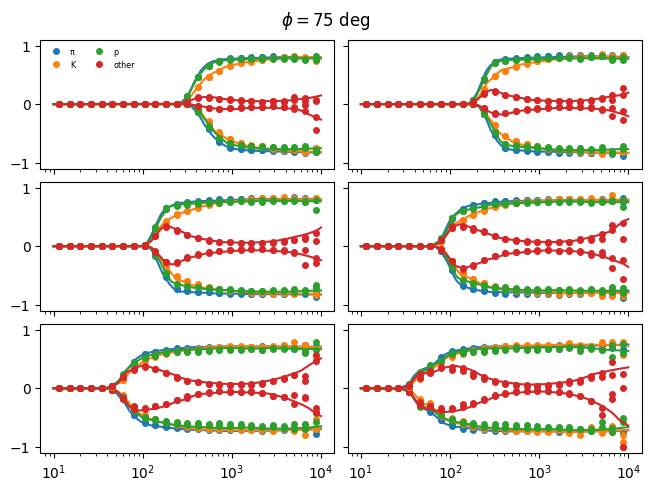

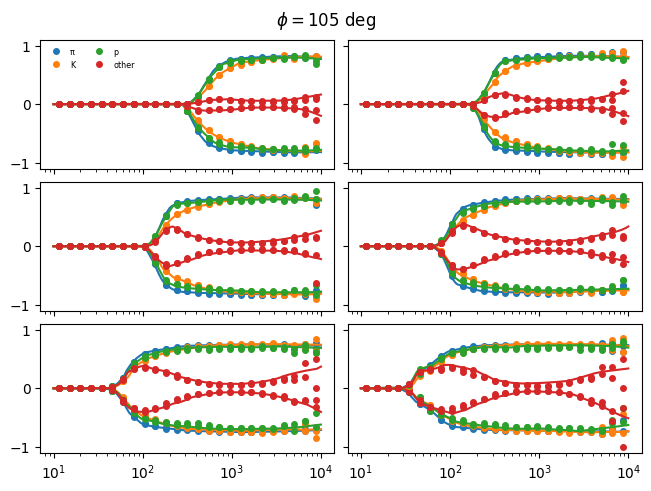

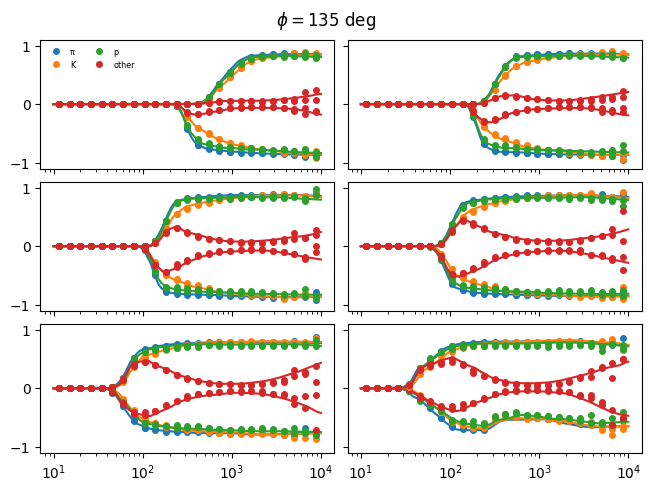

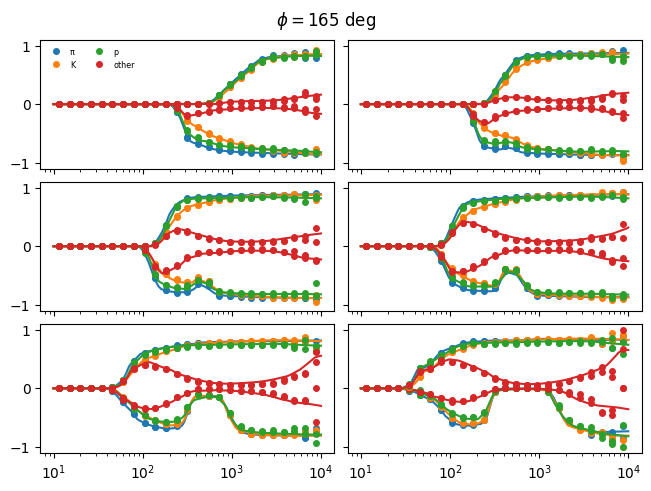

In [18]:
labels = ("π", "K", "p", "other")
for phii in rec.axes[2].centers:
    fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, layout="compressed")
    plt.suptitle(rf"$\phi = {np.degrees(phii):.0f}$ deg")
    for etai, axi in zip(rec.axes[0].centers, axes.flat):
        plt.sca(axi)
        for ich, charge in enumerate((-1, 1)):
            for isp, label in enumerate(labels):
                ma = X[:, 0] == etai
                ma &= np.abs(X[:, 2] - np.cos(phii)) < 0.001
                ma &= X[:, 4] == ich
                ma &= X[:, 5] == isp
                plt.plot(np.exp(X[ma, 1]), charge * y[ma], "o", ms=4, color=f"C{isp}", label=f"{label}" if ich else None)

                mpt = np.geomspace(10, 1e4, 2000)
                Xp = np.empty((len(mpt), 6), dtype=np.float32)
                Xp[:, 0] = etai
                Xp[:, 1] = np.log(mpt)
                Xp[:, 2] = np.cos(phii)
                Xp[:, 3] = np.sin(phii)
                Xp[:, 4] = ich
                Xp[:, 5] = isp
                yp = clf.predict(Xp)
                plt.plot(np.exp(Xp[:, 1]), charge * yp, color=f"C{isp}")
    plt.sca(axes[0,0])
    plt.semilogx()
    plt.ylim(-1.1, 1.1)
    plt.legend(fontsize="xx-small", ncol=2, frameon=False);

## PyTorch

99 0.04177398979663849
199 0.009997050277888775
299 0.005861974321305752
399 0.004657242447137833
Epoch 00493: reducing learning rate of group 0 to 9.0000e-04.
499 0.0037483542691916227
Epoch 00565: reducing learning rate of group 0 to 8.1000e-04.
599 0.003230560105293989
Epoch 00663: reducing learning rate of group 0 to 7.2900e-04.
699 0.002922448795288801
Epoch 00767: reducing learning rate of group 0 to 6.5610e-04.
799 0.002692350186407566
899 0.0025098395999521017
Epoch 00917: reducing learning rate of group 0 to 5.9049e-04.
999 0.002354850061237812
1099 0.002226931508630514
Epoch 01130: reducing learning rate of group 0 to 5.3144e-04.
1199 0.002099312376230955
Epoch 01280: reducing learning rate of group 0 to 4.7830e-04.
1299 0.002005382440984249
Epoch 01398: reducing learning rate of group 0 to 4.3047e-04.
1399 0.0019297945545986295
1499 0.001865047262981534
Epoch 01575: reducing learning rate of group 0 to 3.8742e-04.
1599 0.0018128316150978208
1699 0.001770446659065783
1799 0.0

[]

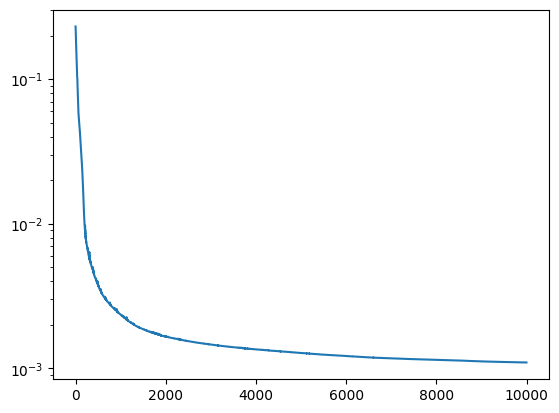

In [66]:
import torch
from torch import nn
import copy
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)
torch.set_default_dtype(torch.float32)

nonlin = nn.ReLU()
num = 2 ** 6
model = nn.Sequential(
    nn.Linear(6, num),
    nonlin,
    nn.Linear(num, num),
    nonlin,
    nn.Linear(num, num),
    nonlin,
    nn.Linear(num, num),
    nonlin,
    nn.Linear(num, num),
    nonlin,
    nn.Linear(num, num),
    nonlin,
    nn.Linear(num, 1),
    nonlin,
    nn.Flatten(0, 1),
)

# must make copies here
X_train = torch.tensor(X.copy())
w_train = torch.tensor(w.copy())
y_train = torch.tensor(y.copy())

max_epoch = 10000
patience = 10
learning_rate = 1e-3
batch = 200

loss_fn = nn.MSELoss()
opt = Adam(model.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(opt, patience=patience, factor=0.8, verbose=True)
# opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.CyclicLR(opt, 1e-5, 1e-1)

def train_one_epoch(epoch):
    running_loss = 0.
    nbatch = len(y_train) // batch 
    for i in range(nbatch):
        sl = slice(i * batch, (i + 1) * batch)
        X_batch = X_train[sl]
        y_batch = y_train[sl]

        opt.zero_grad()

        y_pred = model(X_batch)

        # Compute the loss and its gradients
        loss = loss_fn(y_pred, y_batch)
        loss.backward()

        # Adjust learning weights
        opt.step()

        # Gather data and report
        running_loss += loss.item()
    return running_loss

losses = []
tol = 1e-6
patience_count = 0
prev_lo = np.inf
for epoch in range(max_epoch):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    opt.zero_grad()
    loss.backward()
    opt.step()
    scheduler.step(loss)

    loss = loss.item()
    if epoch % 100 == 99:
        print(epoch, loss)

    if loss - prev_lo < tol:
        patience_count = 0
    else:
        patience_count += 1
    if patience_count > patience:
        break

plt.plot(losses);
plt.semilogy()

In [69]:
print("MLPRegressor", loss_fn(torch.tensor(clf.predict(X)), y_train).item())
print("PyTorch     ", loss_fn(model(X_train), y_train).item())

MLPRegressor 0.0008700121543370187
PyTorch      0.001099919667467475


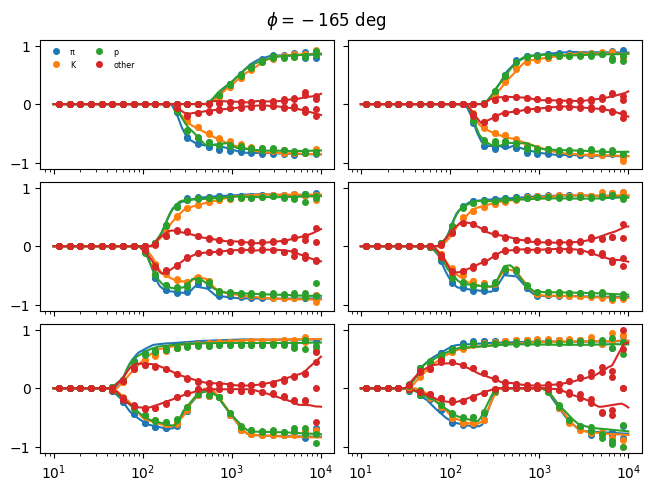

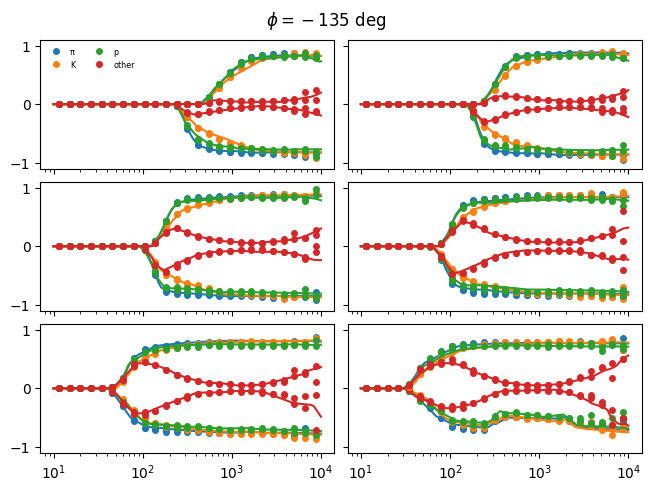

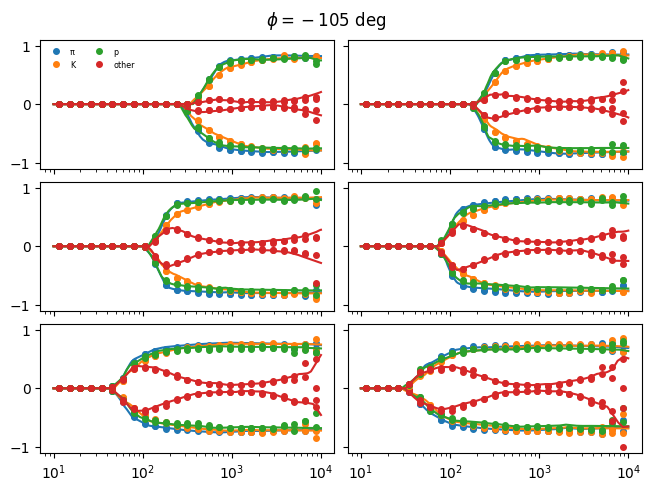

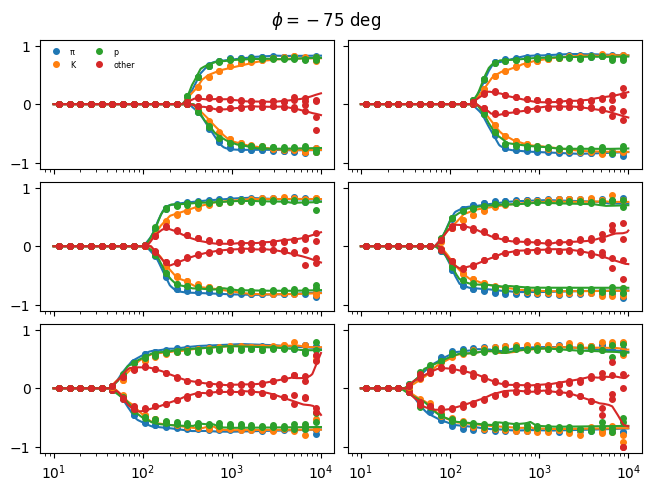

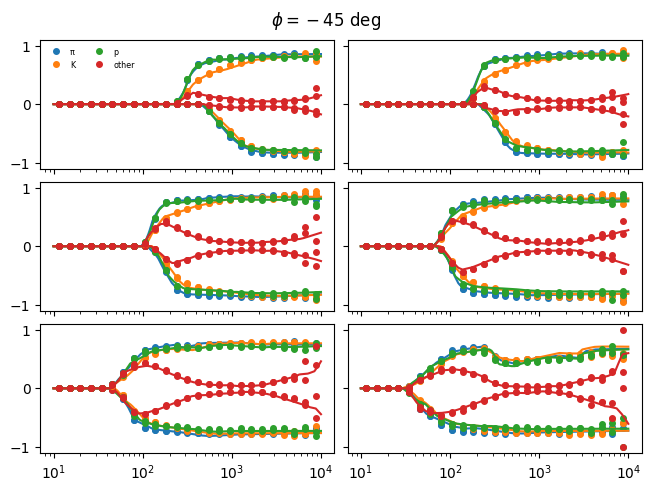

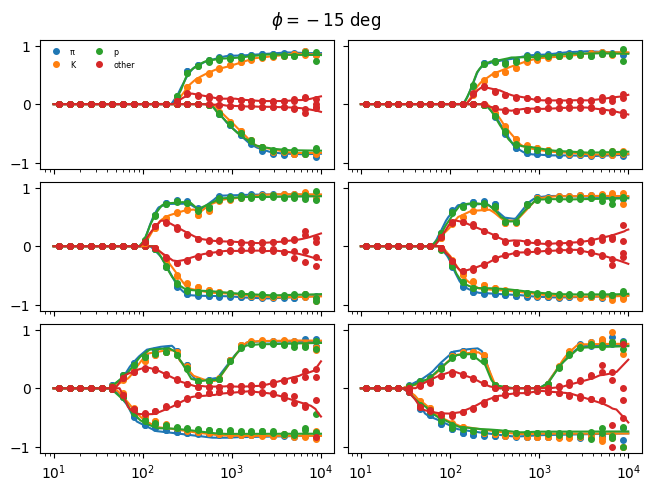

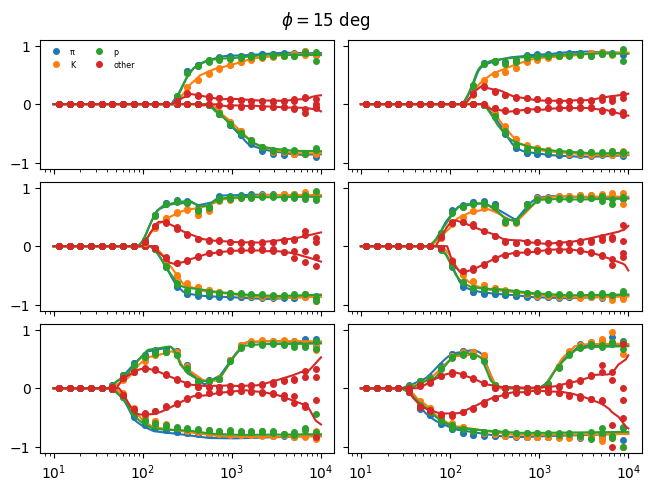

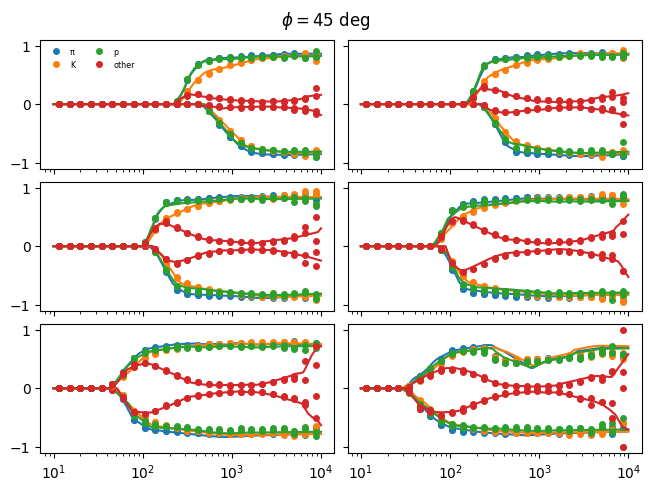

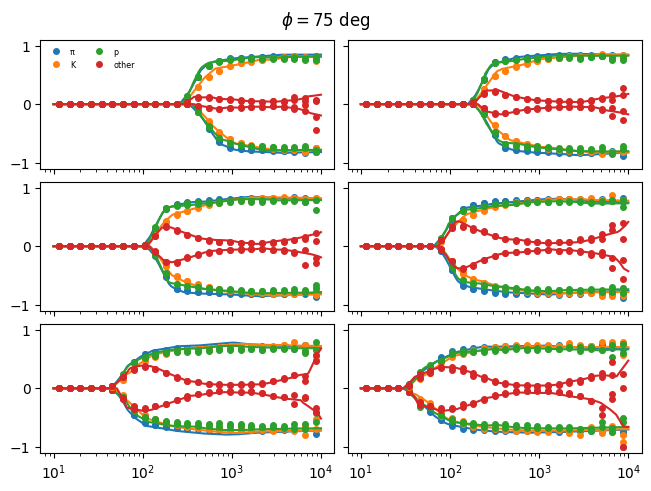

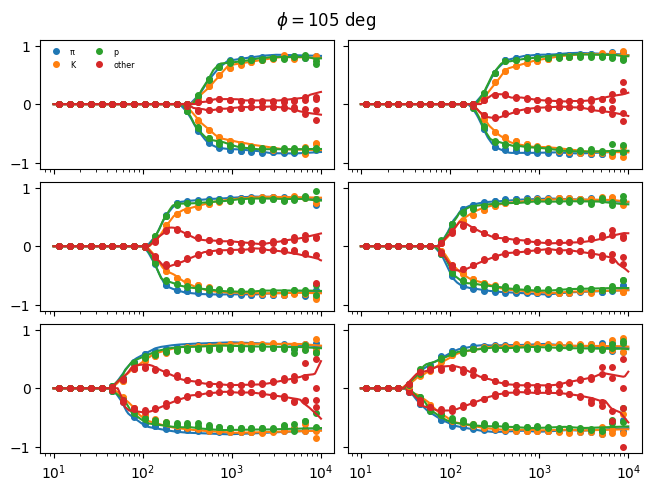

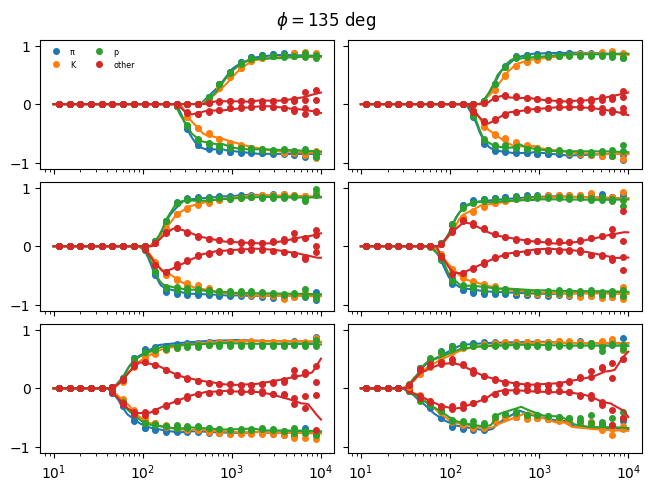

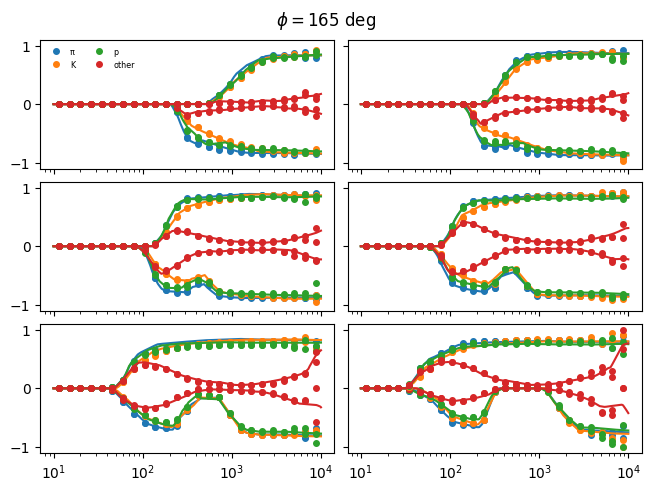

In [70]:
labels = ("π", "K", "p", "other")
for phii in rec.axes[2].centers:
    fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, layout="compressed")
    plt.suptitle(rf"$\phi = {np.degrees(phii):.0f}$ deg")
    for etai, axi in zip(rec.axes[0].centers, axes.flat):
        plt.sca(axi)
        for ich, charge in enumerate((-1, 1)):
            for isp, label in enumerate(labels):
                ma = X[:, 0] == etai
                ma &= np.abs(X[:, 2] - np.cos(phii)) < 0.001
                ma &= X[:, 4] == ich
                ma &= X[:, 5] == isp
                plt.plot(np.exp(X[ma, 1]), charge * y[ma], "o", ms=4, color=f"C{isp}", label=f"{label}" if ich else None)

                mpt = np.geomspace(10, 1e4, 2000)
                Xp = np.empty((len(mpt), 6), dtype=np.float32)
                Xp[:, 0] = etai
                Xp[:, 1] = np.log(mpt)
                Xp[:, 2] = np.cos(phii)
                Xp[:, 3] = np.sin(phii)
                Xp[:, 4] = ich
                Xp[:, 5] = isp
                yp = model(torch.tensor(Xp)).detach().numpy()
                plt.plot(np.exp(Xp[:, 1]), charge * yp, color=f"C{isp}")
    plt.sca(axes[0,0])
    plt.semilogx()
    plt.ylim(-1.1, 1.1)
    plt.legend(fontsize="xx-small", ncol=2, frameon=False);